<a href="https://colab.research.google.com/github/Koushikey4596/Flight-Delay-Prediction/blob/main/Flight_Prediction_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/FlightDelays_1.csv', index_col=False)
df1.head(3).append(df1.tail(3))

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime
2200,1730,RU,1736,EWR,199,1/31/2004,2097,DCA,0,6,31,N13994,ontime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1.shape
df1.isna().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

In [ ]:
df1.columns


Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')

In [ ]:
df1['CARRIER'].replace({
    'UA':'United Airlines',
    'DH':'Douniah Airlines',
    'US':'United States Airlines',
    'RU':'Russian Airlines',
    'CO':'Continental Airlines',
    'MQ':'Envoy Air',
    'OH':'PSA Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

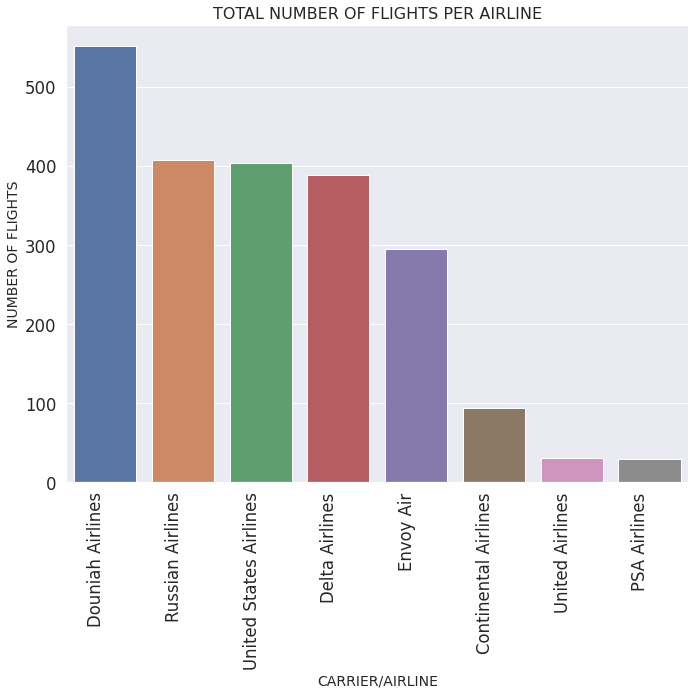

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
axis = sns.countplot(x=df1['CARRIER'], data=df1, order=df1['CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS PER AIRLINE', fontsize=16)
plt.xlabel('CARRIER/AIRLINE', fontsize=14)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df1.CARRIER.value_counts()

Douniah Airlines          551
Russian Airlines          408
United States Airlines    404
Delta Airlines            388
Envoy Air                 295
Continental Airlines       94
United Airlines            31
PSA Airlines               30
Name: CARRIER, dtype: int64

In [ ]:
Flight_status1=[]
for f in df1['Flight Status']:
  if f=='ontime':
    Flight_status1.append('0')
  else:
     Flight_status1.append('1')


In [ ]:
df1['Flight_Status_binary']=pd.Series(Flight_status1, index=df1.index)
df1.to_csv("/content/drive/MyDrive/FlightDelays.csv")

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/FlightDelays.csv', index_col=0)
df1.head(3).append(df1.tail(3))

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Flight_Status_binary
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime,0
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime,0
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,0
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,0
2200,1730,RU,1736,EWR,199,1/31/2004,2097,DCA,0,6,31,N13994,ontime,0


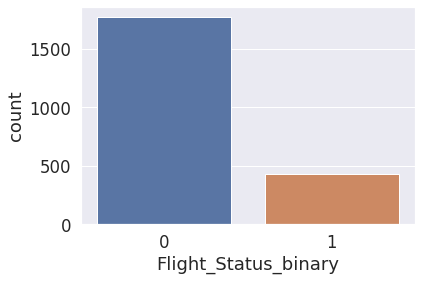

In [ ]:
sns.countplot('Flight_Status_binary', data=df1)

In [ ]:
df1['Flight_Status_binary'].value_counts()

0    1773
1     428
Name: Flight_Status_binary, dtype: int64

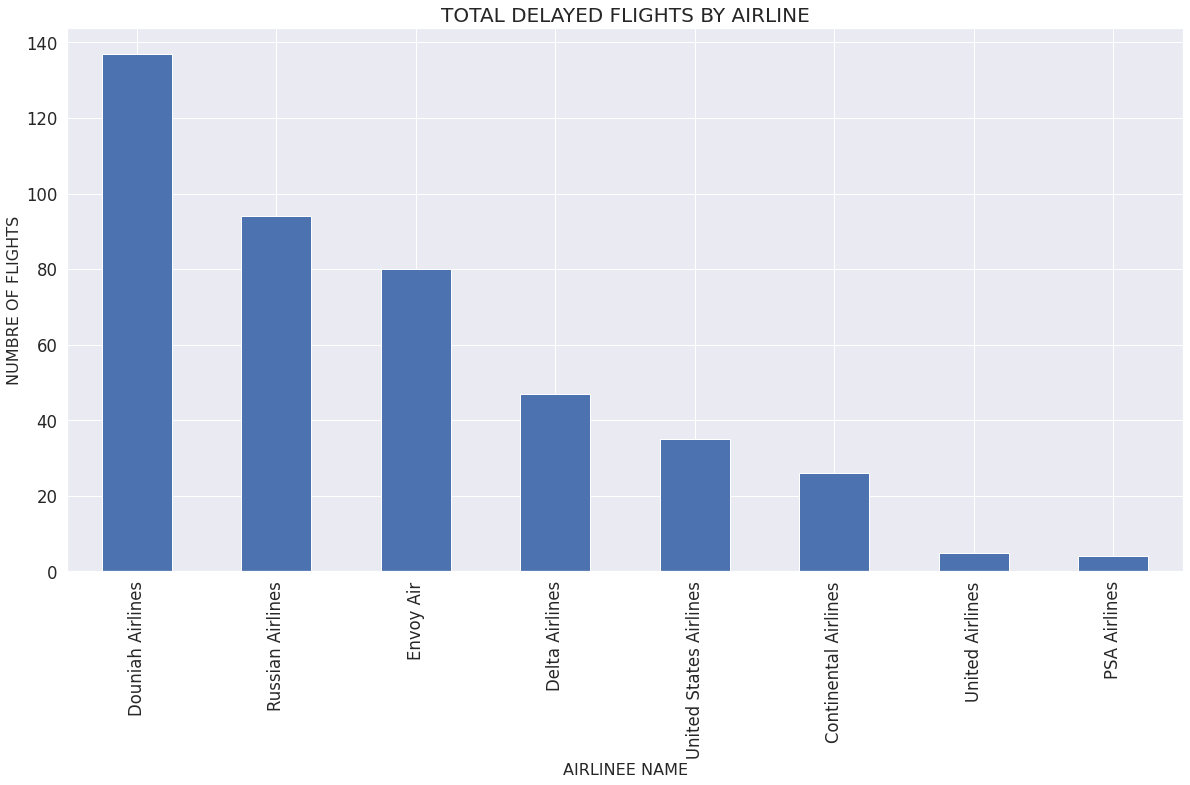

In [ ]:
plt.figure(figsize=(20, 10))
df1.groupby('CARRIER').Flight_Status_binary.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [ ]:
df1.Flight_Status_binary.value_counts(normalize=True)

0    0.805543
1    0.194457
Name: Flight_Status_binary, dtype: float64

In [ ]:
df1_PFD = df1[['CARRIER', 'Flight_Status_binary']]
df1_PFD.head()

,CARRIER,Flight_Status_binary
0,PSA Airlines,0
1,Douniah Airlines,0
2,Douniah Airlines,0
3,Douniah Airlines,0
4,Douniah Airlines,0


In [ ]:
df1_PFD.Flight_Status_binary.value_counts()

0    1773
1     428
Name: Flight_Status_binary, dtype: int64

In [ ]:
test_1 = df1_PFD.groupby(['CARRIER']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df1.CARRIER.value_counts().rename_axis('CARRIER').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='CARRIER')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['Flight_Status_binary']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'Flight_Status_binary': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Continental Airlines,26,94,27.66
1,Delta Airlines,47,388,12.11
2,Douniah Airlines,137,551,24.86
3,Envoy Air,80,295,27.12
4,PSA Airlines,4,30,13.33
5,Russian Airlines,94,408,23.04
6,United Airlines,5,31,16.13
7,United States Airlines,35,404,8.66


In [ ]:
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 428


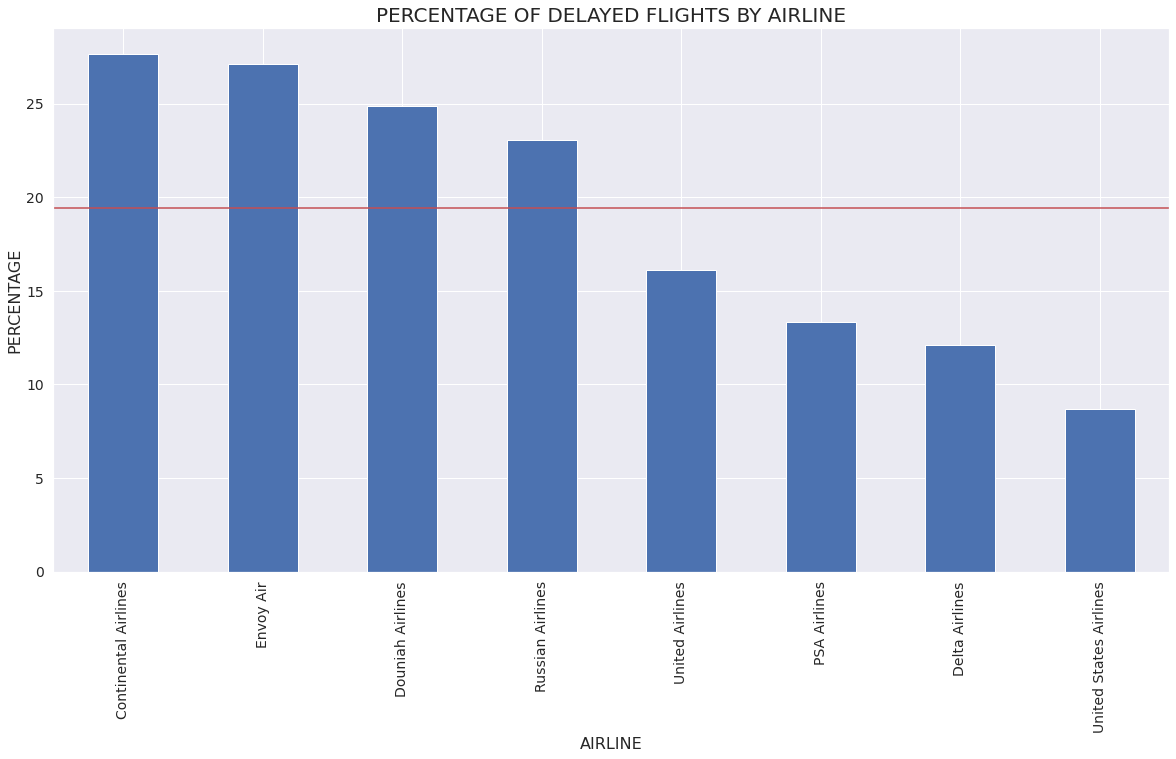

In [ ]:
plt.figure(figsize=(20, 10))
df_fp.groupby('CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=19.44, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

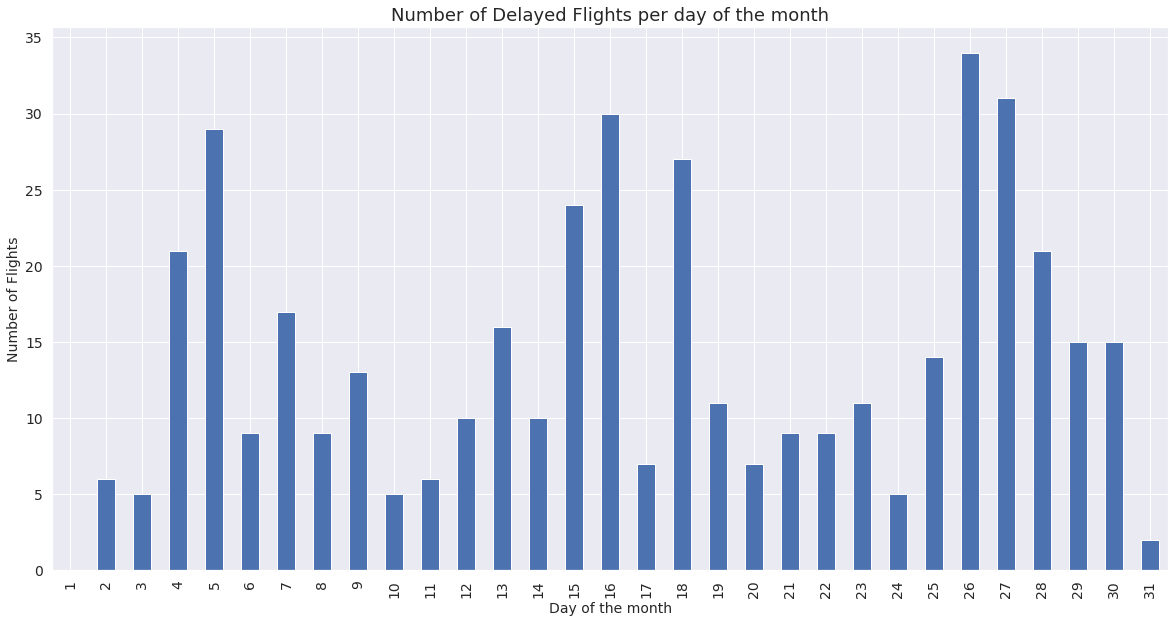

In [ ]:
plt.figure(figsize=(20, 10))
df1.groupby('DAY_OF_MONTH').Flight_Status_binary.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

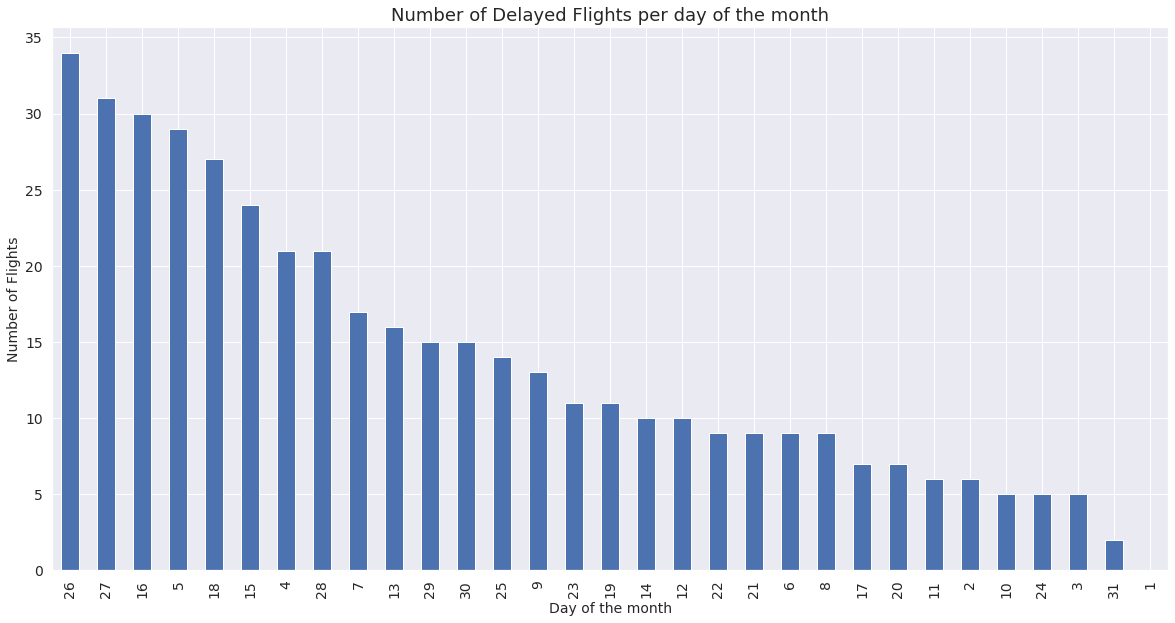

In [ ]:
plt.figure(figsize=(20, 10))
df1.groupby('DAY_OF_MONTH').Flight_Status_binary.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

In [ ]:
df1['DEP_DELAY'] = df1.apply(lambda column: column.DEP_TIME - column.CRS_DEP_TIME, axis=1)

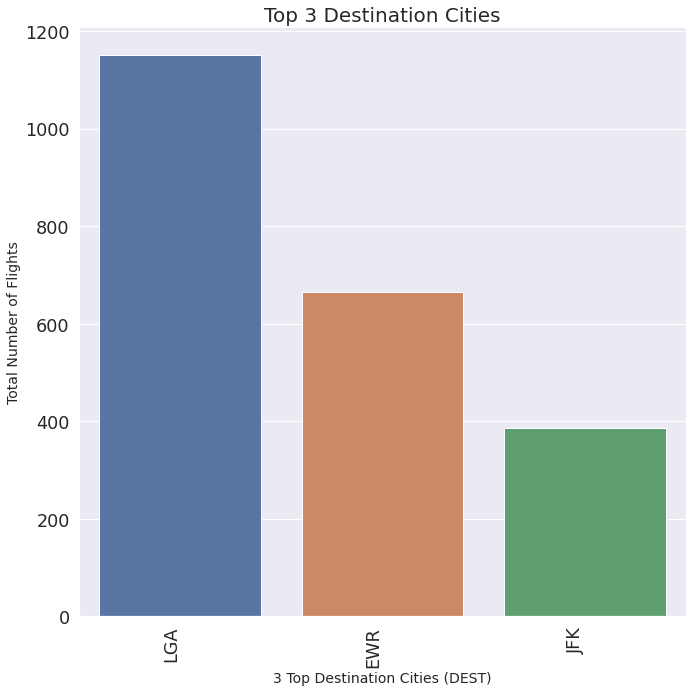

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 3 Destination Cities', fontsize=20)
plt.xlabel('3 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()